In [274]:
from pathlib import Path
import scipy
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby


root_path = Path().cwd().parent.parent
figures_path = Path().resolve() / "figures"

In [216]:
randoms_state = 40

values = scipy.stats.beta.rvs(a=1.5, b=2.5, size=28, random_state=randoms_state)
values = np.round((values * 15), 2)

values

array([ 3.59,  0.85,  5.09,  5.09,  2.4 ,  8.3 ,  3.09, 10.26,  6.14,
        1.3 ,  6.81,  6.12,  6.3 ,  3.98,  3.4 ,  8.53,  7.73,  7.14,
        9.37,  7.66,  2.01,  0.58,  0.55,  7.81,  3.35,  5.98,  3.41,
       13.05])

/var/folders/2p/xwbh96650y954yp6j0bgdw9h0000gp/T/ipykernel_33665/1706199790.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


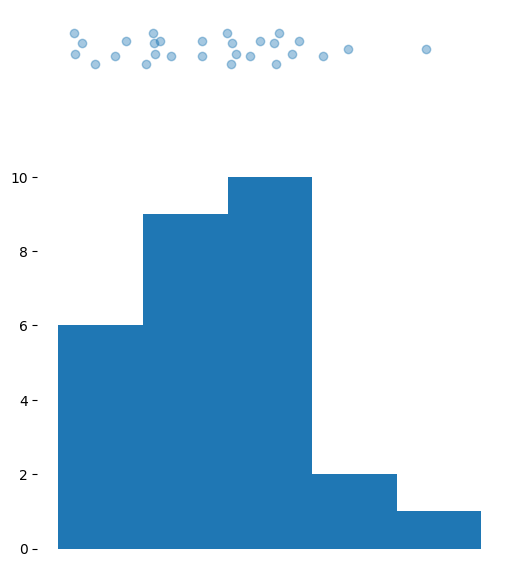

In [284]:
fig, (ax2, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(6, 7), height_ratios=[2, 10], gridspec_kw={'hspace': 0.3})
ax1.hist(values, bins=[0, 3, 6, 9, 12, 15])

ax1.set_xticks([0, 3, 6, 9, 12, 15])

x = []
y = []
for key, numbers in groupby(np.sort(values), key=np.round):
    numbers = list(numbers)
    count = len(numbers)

    if count == 1:
        offset = [0]
    elif count % 2 == 0:
        offset = np.linspace(-count / 2, count / 2, count)
    else:
        offset = np.linspace(-count / 2, count / 2, count)


    np.random.shuffle(numbers)

    x.extend(numbers)
    y.extend(offset)

ax2.scatter(x, y, alpha=0.4)
ax2.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax2.set_ylim(-5, 5)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(ax1.get_xlim())

ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# ax1.set_yticks([])
ax1.set_xticks([])
ax1.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

fig.tight_layout()

fig.savefig(figures_path / "histograms_overview_1.png", dpi=900)

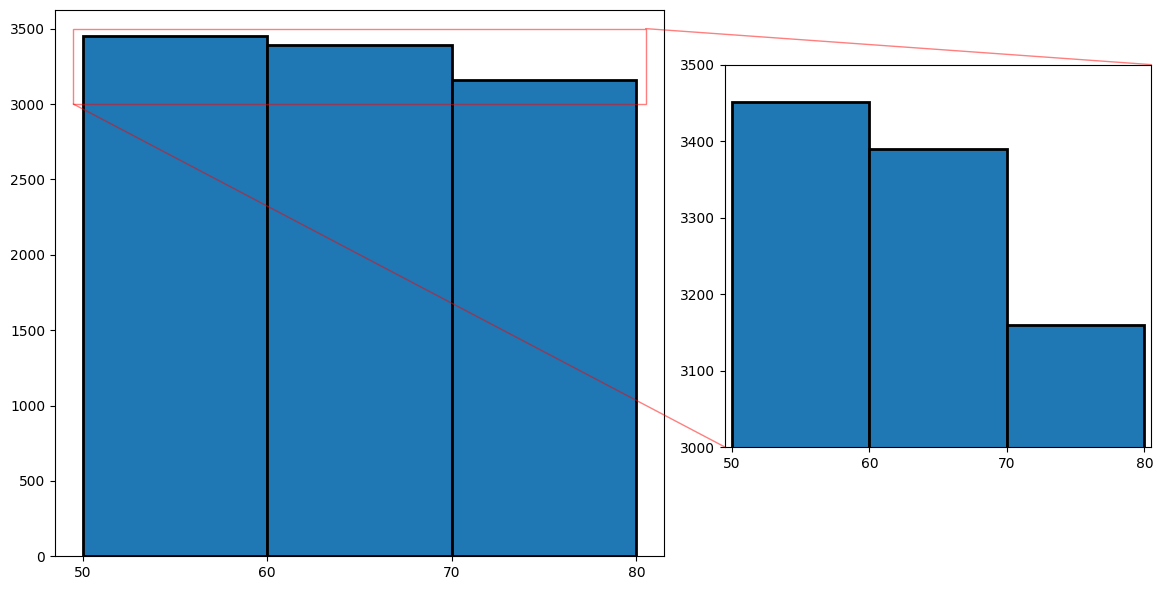

In [365]:
randoms_state_2 = 38

values = scipy.stats.beta.rvs(a=1, b=1.05, size=10000, random_state=randoms_state)
values = (values * 30) + 50

fig, ax = plt.subplots(figsize=(18, 6))

ax.hist(values, bins=3, edgecolor="black", linewidth=2)
ax.set_xticks([50, 60, 70, 80])

inset_ax = ax.inset_axes([1.1, 0.2, 0.7, 0.7])

inset_ax.hist(values, bins=3, edgecolor="black", linewidth=2)
inset_ax.set_xlim(49.5, 80.5)
inset_ax.set_xticks([50, 60, 70, 80])
inset_ax.set_ylim(3000, 3500)

ax.indicate_inset_zoom(inset_ax, edgecolor='red')

fig.tight_layout()

fig.savefig(figures_path / "histograms_overview_3.png", dpi=900)